In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk import wordpunct_tokenize
from nltk.corpus import stopwords

In [128]:
# Get tfidf
train_csv = '../data/augmented_train.csv'
root = '.'
df_train = pd.read_csv(os.path.join(root, train_csv), header=None)
df_train.columns = ['cls', 'text']
tfidf = TfidfVectorizer(
    ngram_range=(1, 2),
    stop_words=stopwords.words('english'),
    max_df=0.8,
    min_df=10,
    max_features=5096
)

tfidf.fit(df_train['text'].tolist())

TfidfVectorizer(max_df=0.8, max_features=5096, min_df=10, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [129]:
import re
df_result = pd.read_csv('../results9/attribution_scores.csv')
column_name = df_result.columns.tolist()
f = column_name[2][0]
replaced_col = [re.sub(f,'',x) for x in column_name]

In [130]:
def label_class(df):
    # Use to generate true class in the event not available
    df_copy = df.copy()
    length = len(df)
    number_per_class = int(length/4)
    list_ = sorted([i for _ in range(number_per_class) for i in range(4)])
    df_copy['true_class_labels'] = list_
    return df_copy

In [131]:
df_result.columns = replaced_col
df_result = label_class(df_result)
df_result = df_result.loc[:,~df_result.columns.duplicated()].copy()  # remove duplicate columns
df_result

,Unnamed: 0,buy,million,help,some,education,incredible,one,music,time,...,sun,Her,blighted,official,summertime,road,shorts,chords,predicted_class_labels,true_class_labels
0,208,-0.053277,-0.012767,-0.015157,0.002962,-0.059823,0.111251,-0.031027,-0.036924,-0.005049,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0,0
1,119,0.000000,0.000000,0.000000,-0.028522,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0,0
2,440,0.000000,0.000000,0.000000,-0.036997,0.000000,0.000000,-0.015514,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0,0
3,72,0.000000,0.000000,0.000000,-0.020509,0.000000,0.000000,-0.000561,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0,0
4,734,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025287,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0,0
5,1496,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1,1
6,894,0.000000,0.000000,0.000000,0.025985,0.000000,0.000000,0.031998,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2,1
7,1085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2,1
8,1346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1,1
9,817,0.000000,0.000000,0.000000,0.034251,0.000000,0.000000,0.022458,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1,1


### Get actual text from test csv

In [132]:
#Get actual text from test csv

index = df_result['Unnamed: 0']
df_test = pd.read_csv('../data/balancedtest.csv', header = None)
df_test.columns = ['cls','text']

In [133]:
df_results_text = df_test.iloc[index]
df_results_text
tested_tfidf = tfidf.transform(df_results_text['text'].tolist())
tested_tfidf

<20x5096 sparse matrix of type '<class 'numpy.float64'>'
	with 2999 stored elements in Compressed Sparse Row format>

### For each class we want to extract the top & bottom N words based on their attribution score

In [134]:
def take_average_across_true_groups(df,save_name,N=10):
    l = df.copy()
    
    class_labels = {0:"satire",1:"hoax",2:"propoganda",3:"reliable"}
    
    average_attr_score = l.groupby(['true_class_labels']).mean().reset_index().drop(['true_class_labels'], axis=1)
    
    m = average_attr_score.T
    m.columns = ['0','1','2','3']
    class_0 = m['0'].sort_values(ascending=False)
    class_1 = m['1'].sort_values(ascending=False)
    class_2 = m['2'].sort_values(ascending=False)
    class_3 = m['3'].sort_values(ascending=False)
    
    all_res = [class_0,class_1,class_2,class_3]
    i = 0
    for cls_ in all_res:
        # print(f"Class {i}")
        # print(f"Top {N} words: \n", cls_[:N])
        # print()
        # print(f"Bottom {N} words: \n", cls_[-N:])
        # print("#"*100)
        
        top_few_word = cls_[:N]
        bottom_few_word = cls_[-N:]
        
        m = pd.concat([top_few_word,bottom_few_word],axis=0)
        m[::-1].plot.barh(title = f'Class {i}: {class_labels[i]}',figsize = (8, 10), fontsize = 18)
        plt.xlabel('Attribution Scores', fontsize=14)
        plt.yticks(fontsize = 14)
        plt.xticks(fontsize = 12)
        plt.tight_layout()
        plt.savefig(f'../figures/{save_name}_{i}.png',dpi=300)
        plt.show()
        
        i+=1
    # return all_res

def take_average_across_pred_groups(df,save_name,N=10):
    l = df.copy()
    
    class_labels = {0:"satire",1:"hoax",2:"propoganda",3:"reliable"}
    
    average_attr_score = l.groupby(['predicted_class_labels']).mean().reset_index().drop(['predicted_class_labels'], axis=1)
    
    m = average_attr_score.T
    m.columns = ['0','1','2','3']
    class_0 = m['0'].sort_values(ascending=False)
    class_1 = m['1'].sort_values(ascending=False)
    class_2 = m['2'].sort_values(ascending=False)
    class_3 = m['3'].sort_values(ascending=False)
    
    all_res = [class_0,class_1,class_2,class_3]
    i = 0
    for cls_ in all_res:
        # print(f"Class {i}")
        # print(f"Top {N} words: \n", cls_[:N])
        # print()
        # print(f"Bottom {N} words: \n", cls_[-N:])
        # print("#"*100)
        
        top_few_word = cls_[:N]
        bottom_few_word = cls_[-N:]
        
        m = pd.concat([top_few_word,bottom_few_word],axis=0)
        m[::-1].plot.barh(title = f'Class {i}: {class_labels[i]}',figsize = (8, 10),fontsize = 18)
        plt.xlabel('Attribution Scores', fontsize=14)
        plt.yticks(fontsize = 14)
        plt.xticks(fontsize = 12)
        plt.tight_layout()
        plt.savefig(f'../figures/{save_name}_{i}.png',dpi=300)
        plt.show()
        
        i+=1
    # return all_res

In [135]:
l_true = df_result.drop(['Unnamed: 0','predicted_class_labels'],axis=1)
l_true.head()

,buy,million,help,some,education,incredible,one,music,time,harder,...,populace,sun,Her,blighted,official,summertime,road,shorts,chords,true_class_labels
0,-0.053277,-0.012767,-0.015157,0.002962,-0.059823,0.111251,-0.031027,-0.036924,-0.005049,0.019916,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.000000,0.000000,0.000000,-0.028522,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.000000,0.000000,0.000000,-0.036997,0.000000,0.000000,-0.015514,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.000000,0.000000,0.000000,-0.020509,0.000000,0.000000,-0.000561,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025287,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [136]:
l_pred = df_result.drop(['Unnamed: 0','true_class_labels'],axis=1)

### Analyze Raw

With respect to true class aggregate

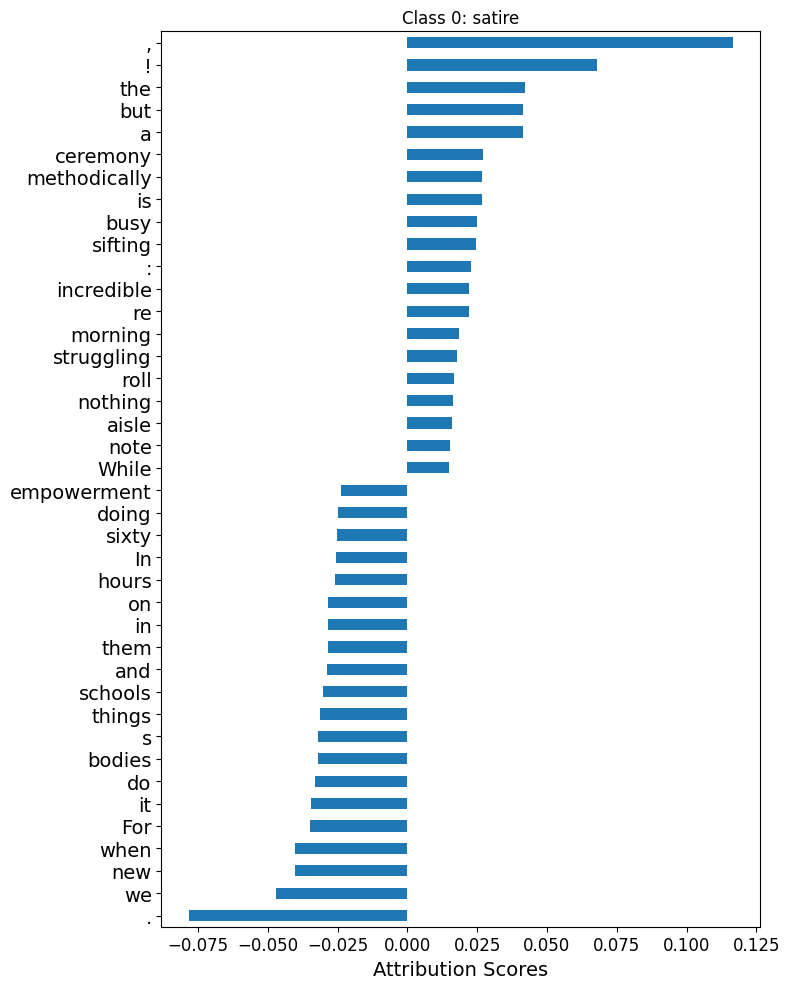

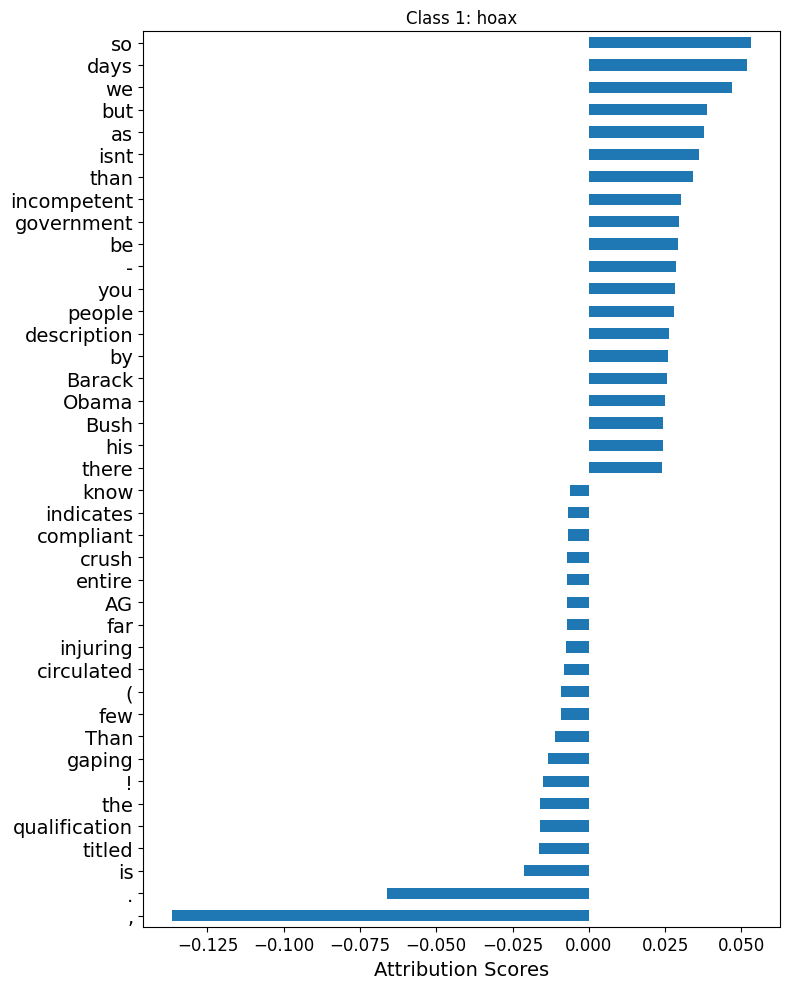

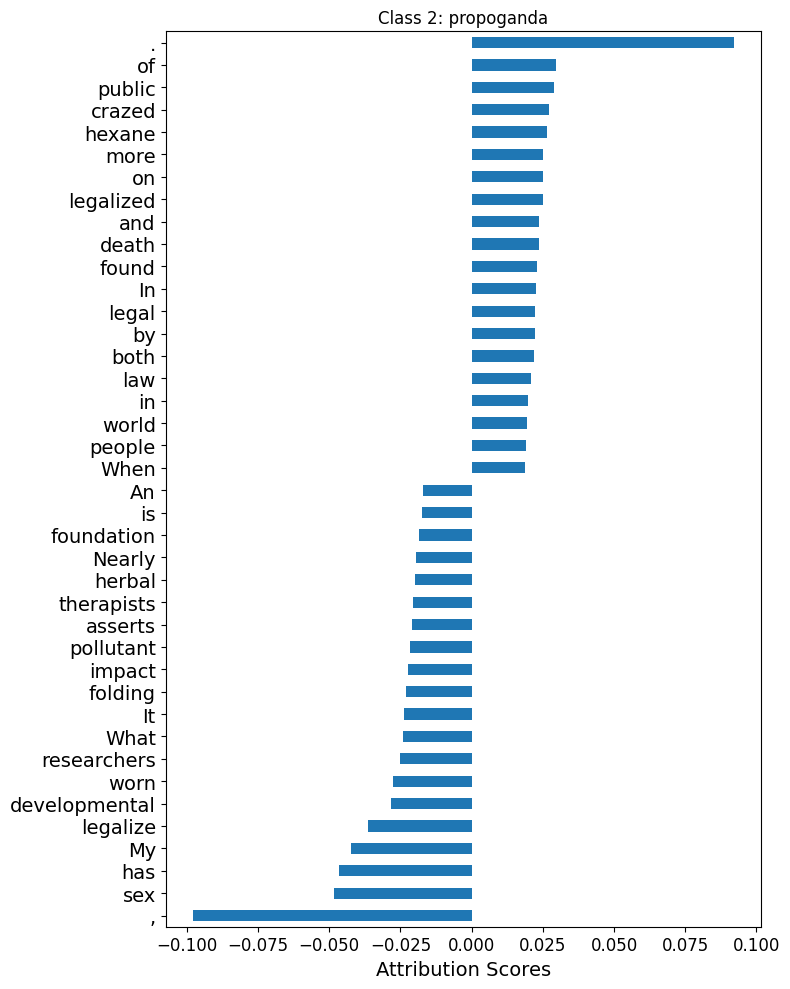

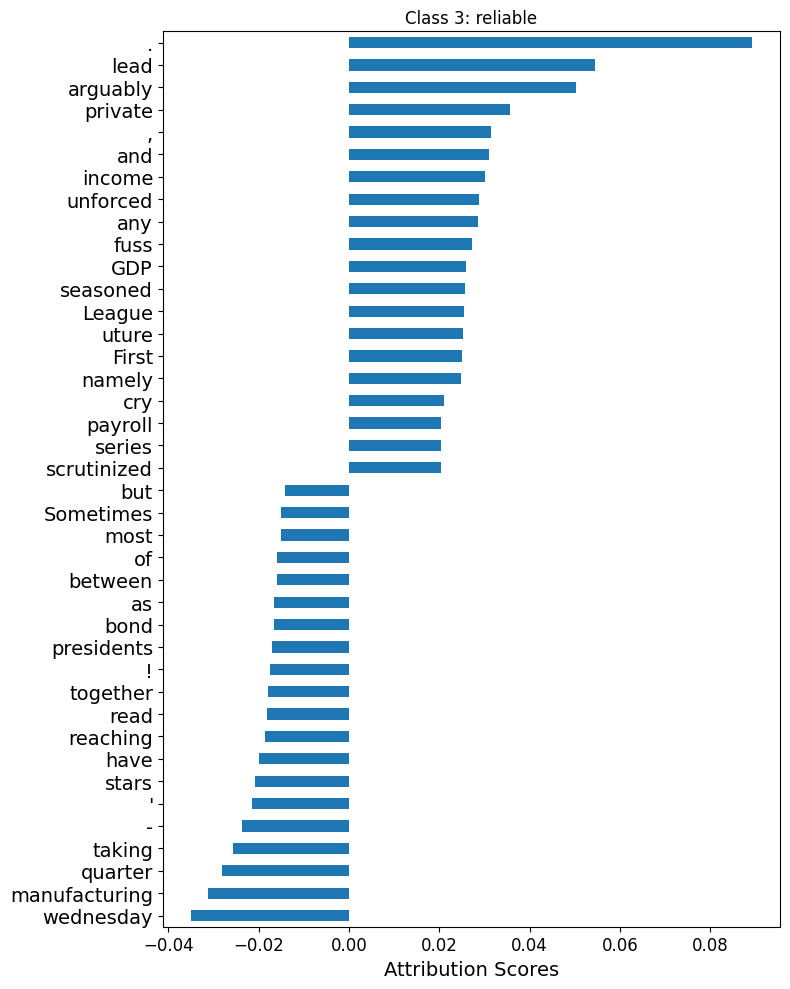

In [137]:
take_average_across_true_groups(l_true,'wrt_true',20);

With respect to predicted class aggregate

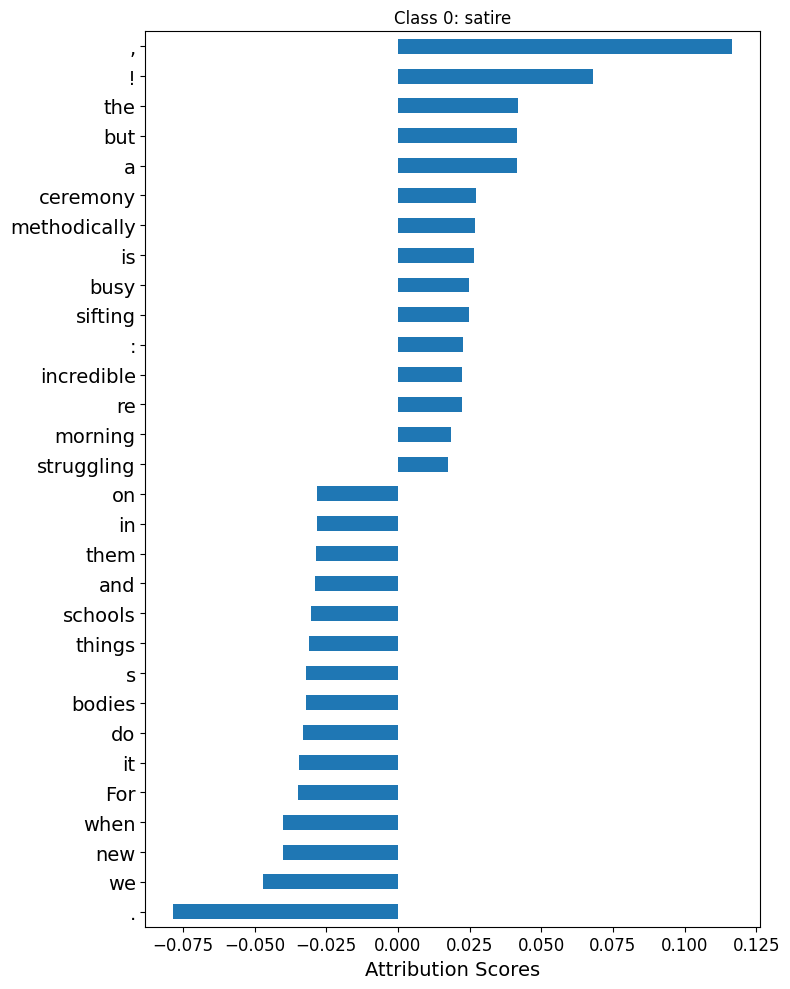

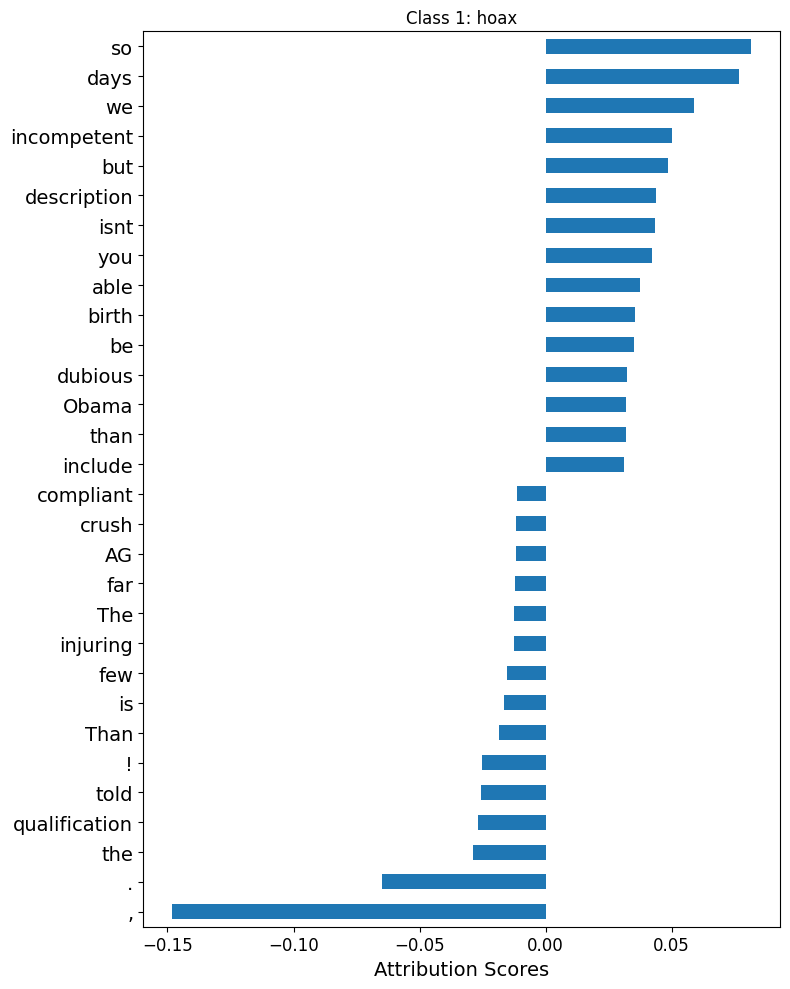

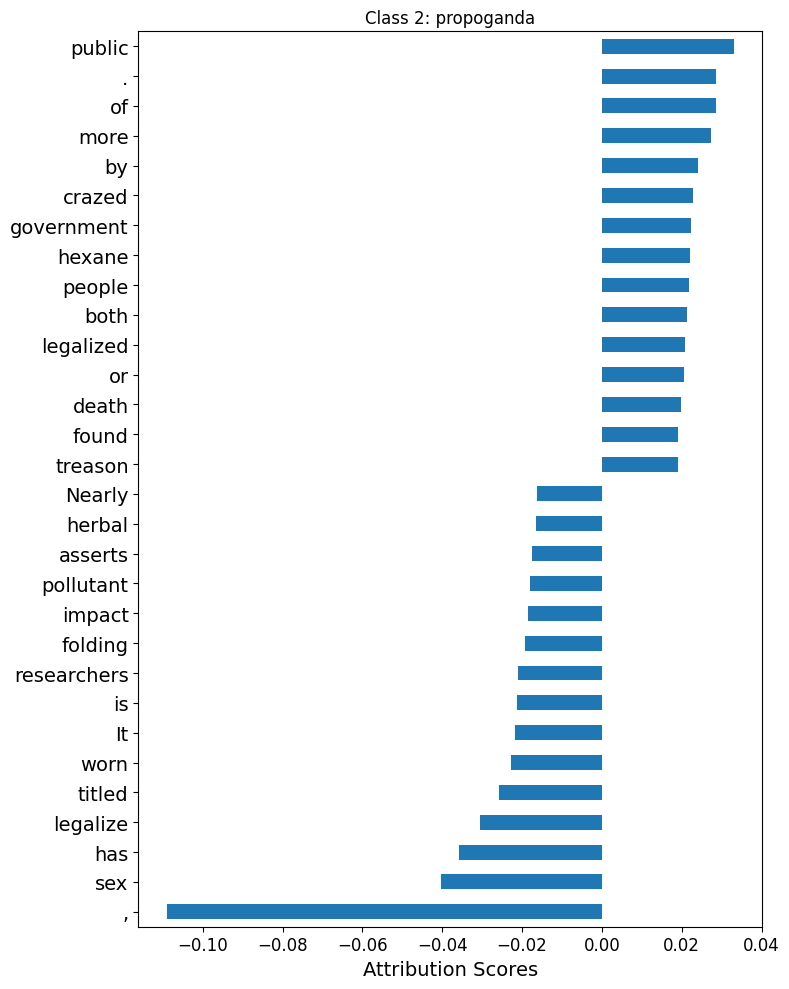

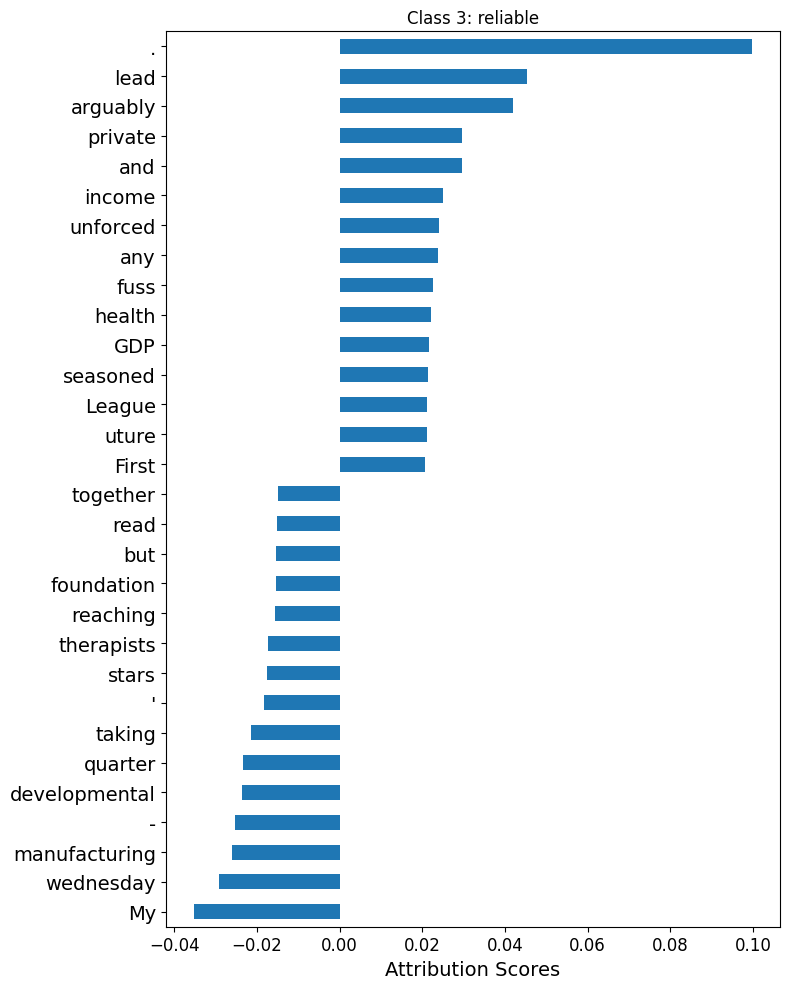

In [138]:
take_average_across_pred_groups(l_pred,'wrt_pred',15)

### Analyse stopwords

In [139]:
stopwords = stopwords.words('english')

In [140]:
filter_stopwords_true = ['true_class_labels']  #extract stopwords that is in the attribution corpus
for col in df_result.columns:
    if col in stopwords:
        filter_stopwords_true.append(col)

In [141]:
filter_stopwords_pred = ['predicted_class_labels']  #extract stopwords that is in the attribution corpus
for col in df_result.columns:
    if col in stopwords:
        filter_stopwords_pred.append(col)

With respect to true class aggregate

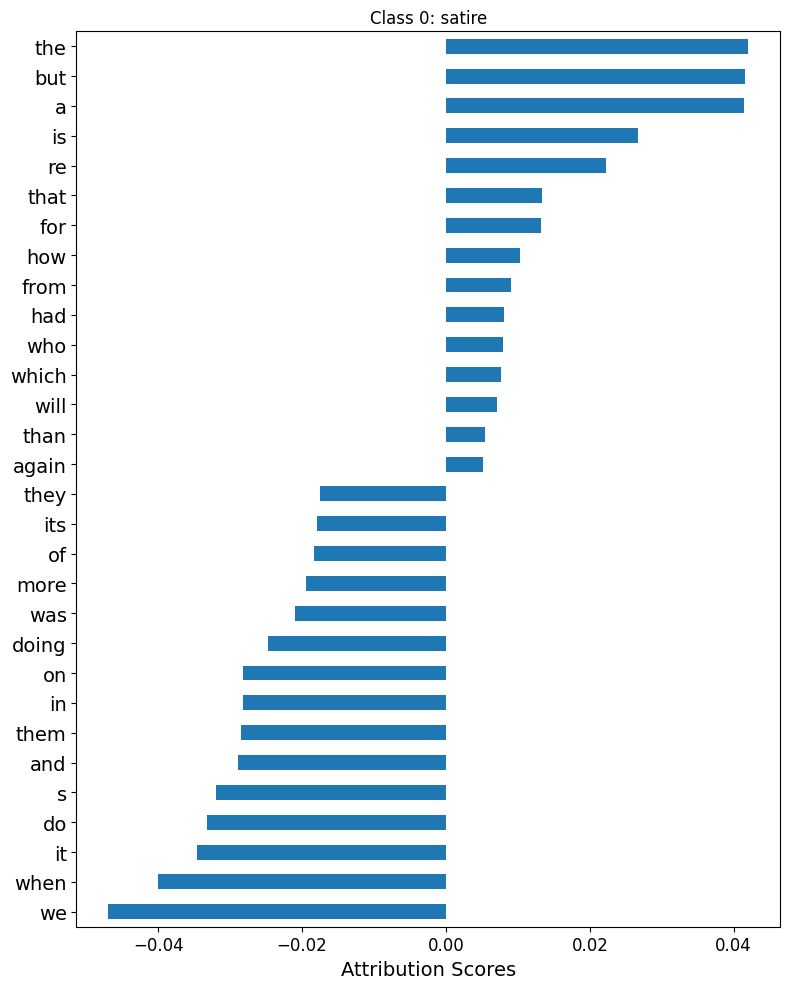

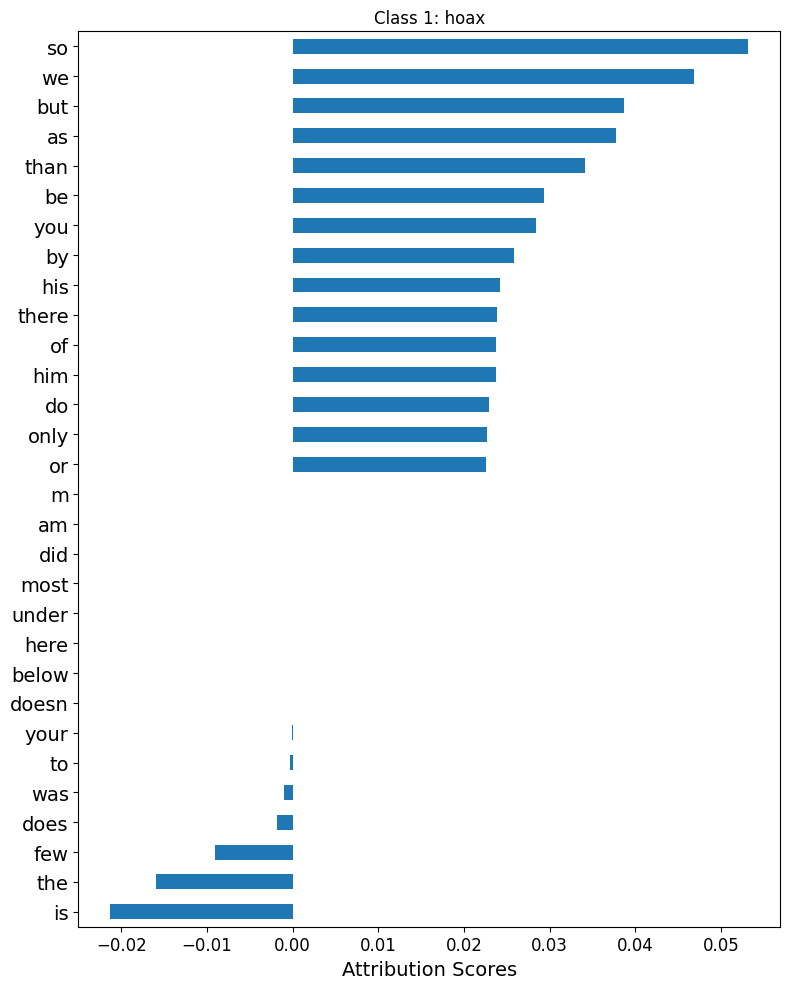

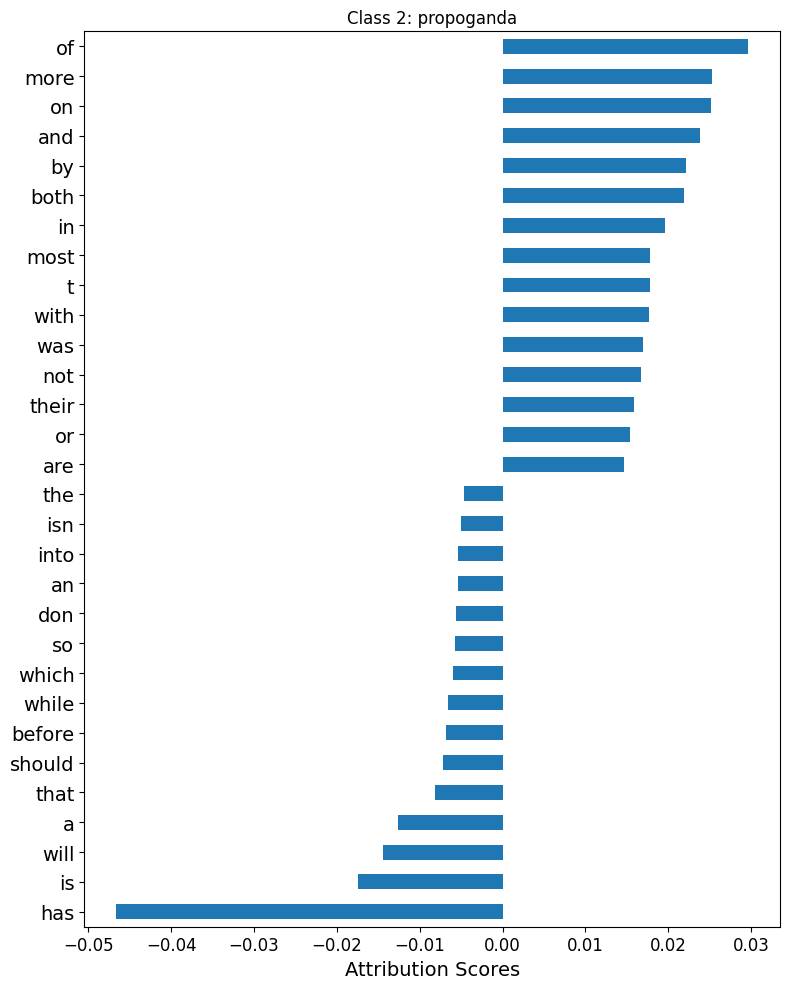

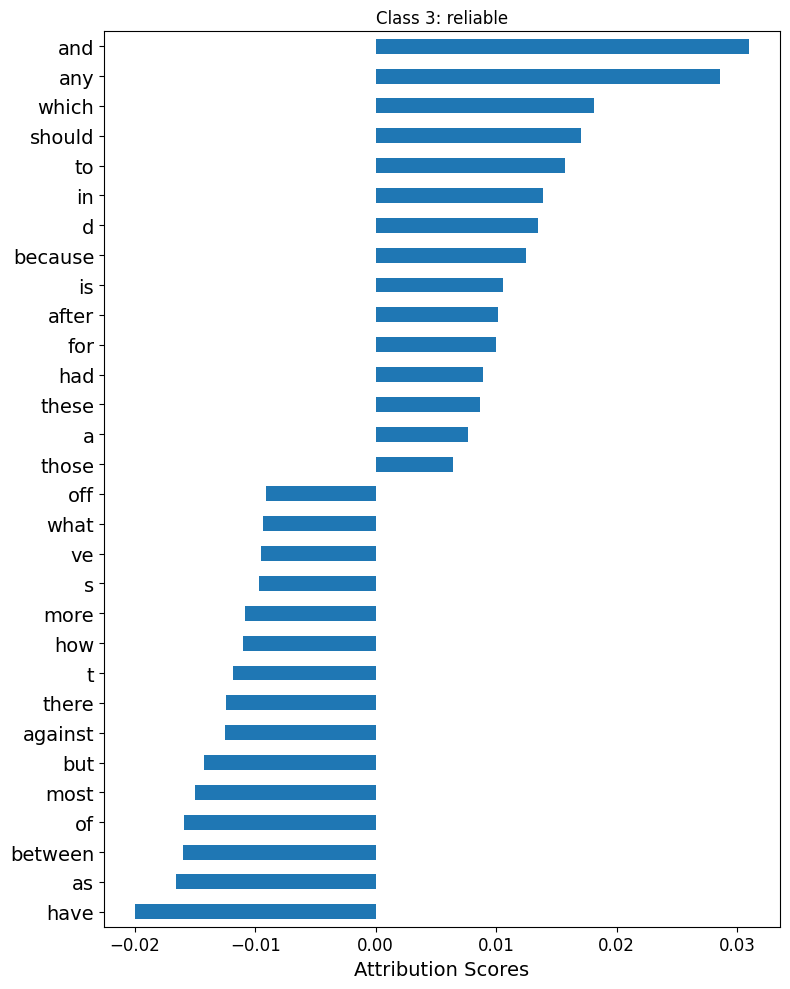

In [142]:
df_attr_stopwords = df_result[filter_stopwords_true]
take_average_across_true_groups(df_attr_stopwords,'wrt_true',15)

With respect to predicted class aggregate

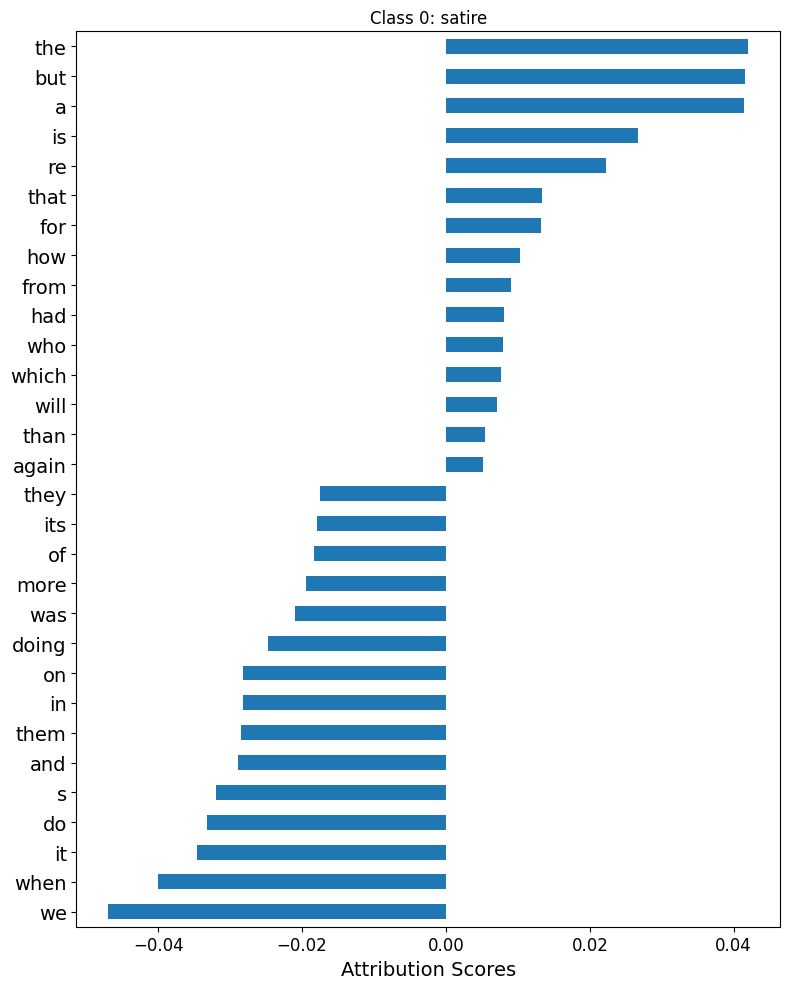

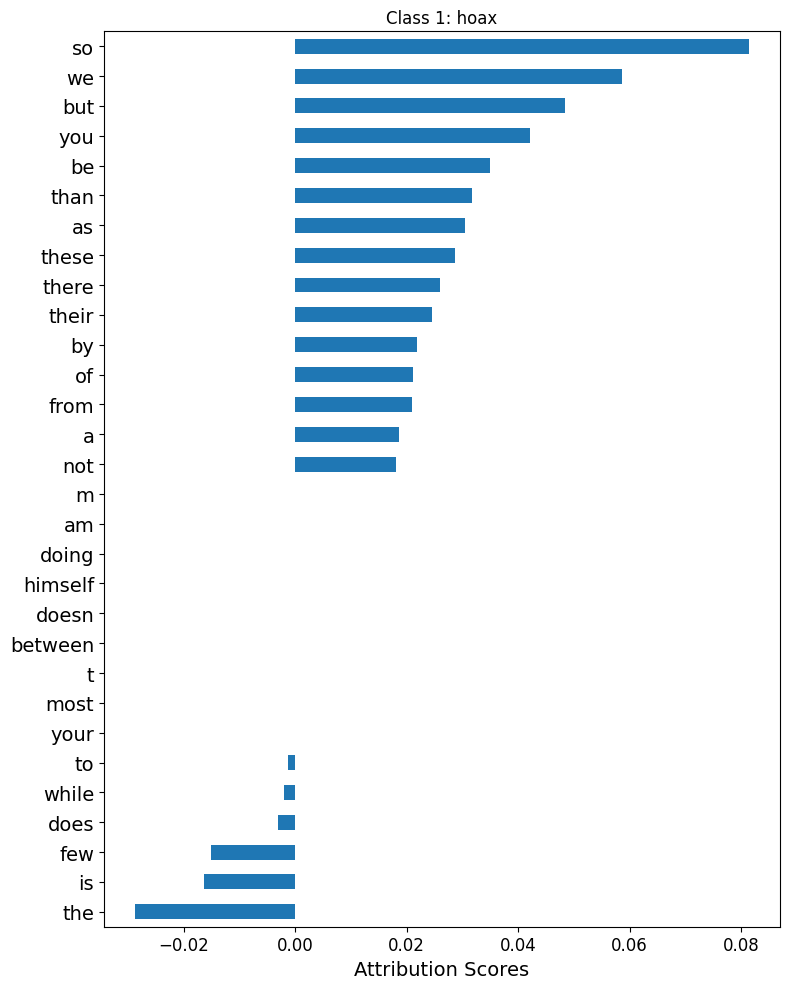

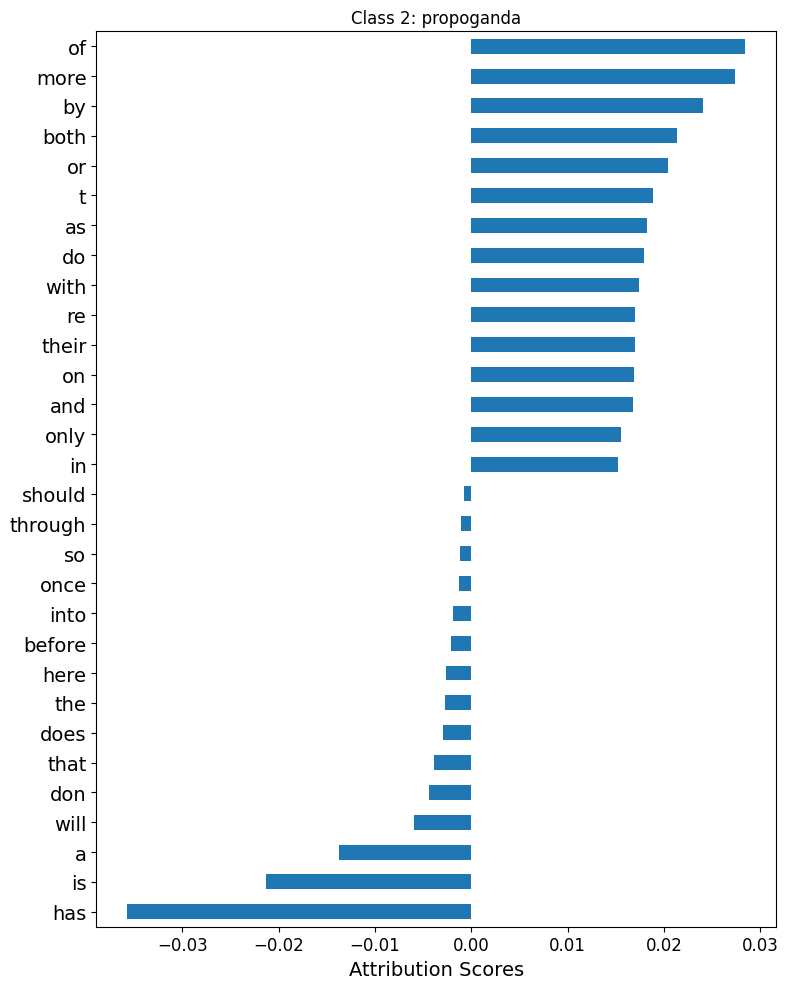

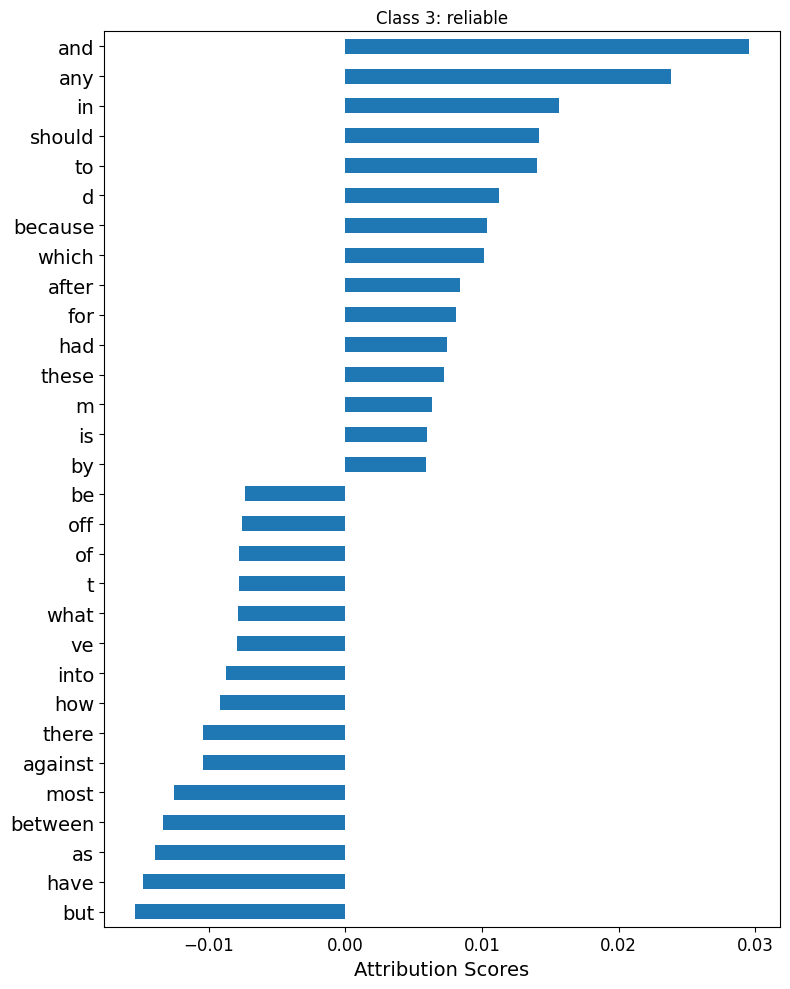

In [143]:
df_attr_stopwords = df_result[filter_stopwords_pred]
take_average_across_pred_groups(df_attr_stopwords,'wrt_true',15)

### Analyse Non stopword and Punctuations

In [144]:
import string
punctutations = string.punctuation

fitlered_words_impt_true = []

for col in df_result.columns:
    if (col in stopwords) or (col in punctutations):
        continue
    fitlered_words_impt_true.append(col)
    
fitlered_words_impt_true;

In [145]:
fitlered_words_impt_pred = []

for col in df_result.columns:
    if (col in stopwords) or (col in punctutations):
        continue
    fitlered_words_impt_pred.append(col)
    
fitlered_words_impt_pred;

With respect to true class aggregate

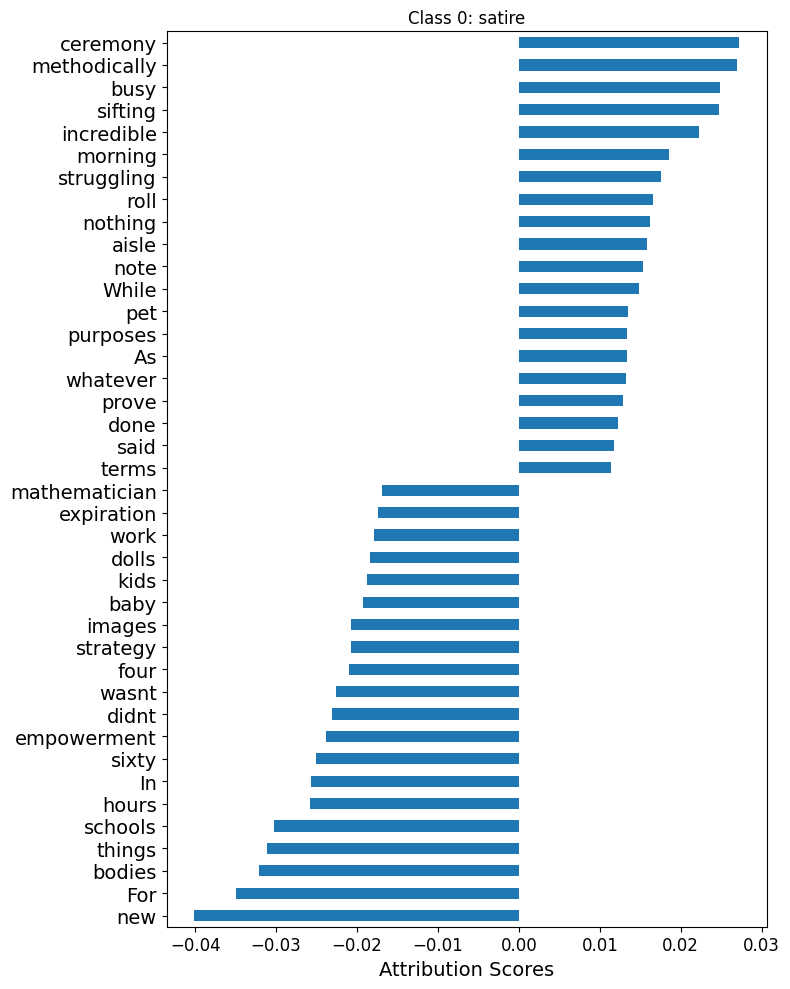

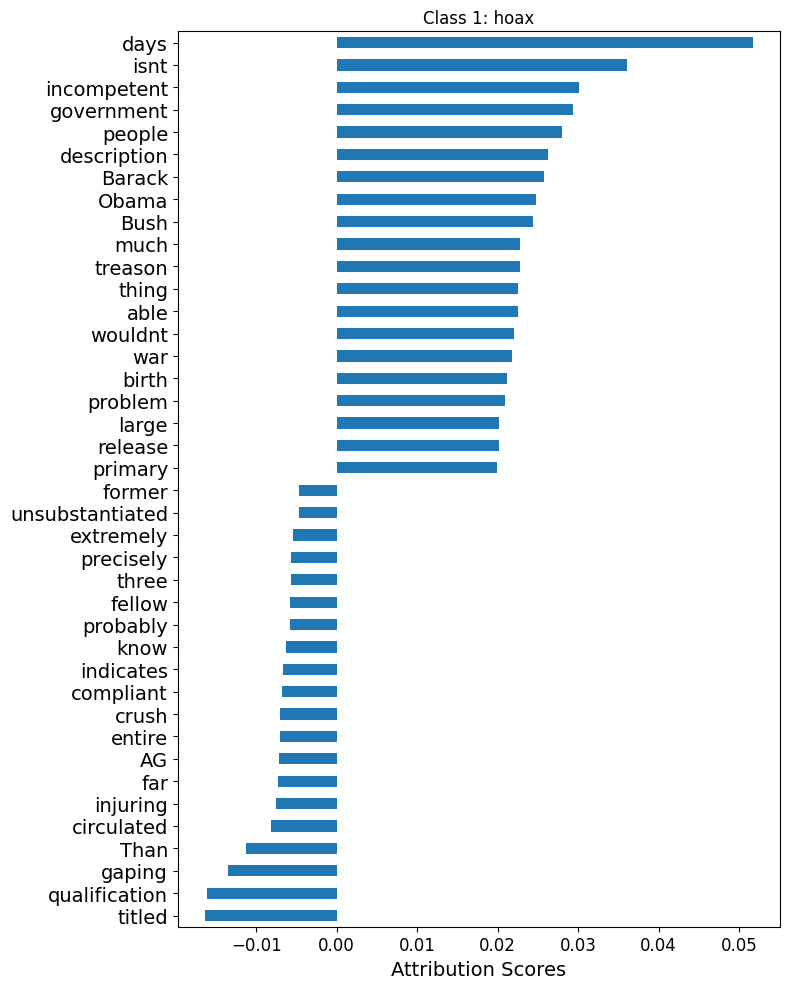

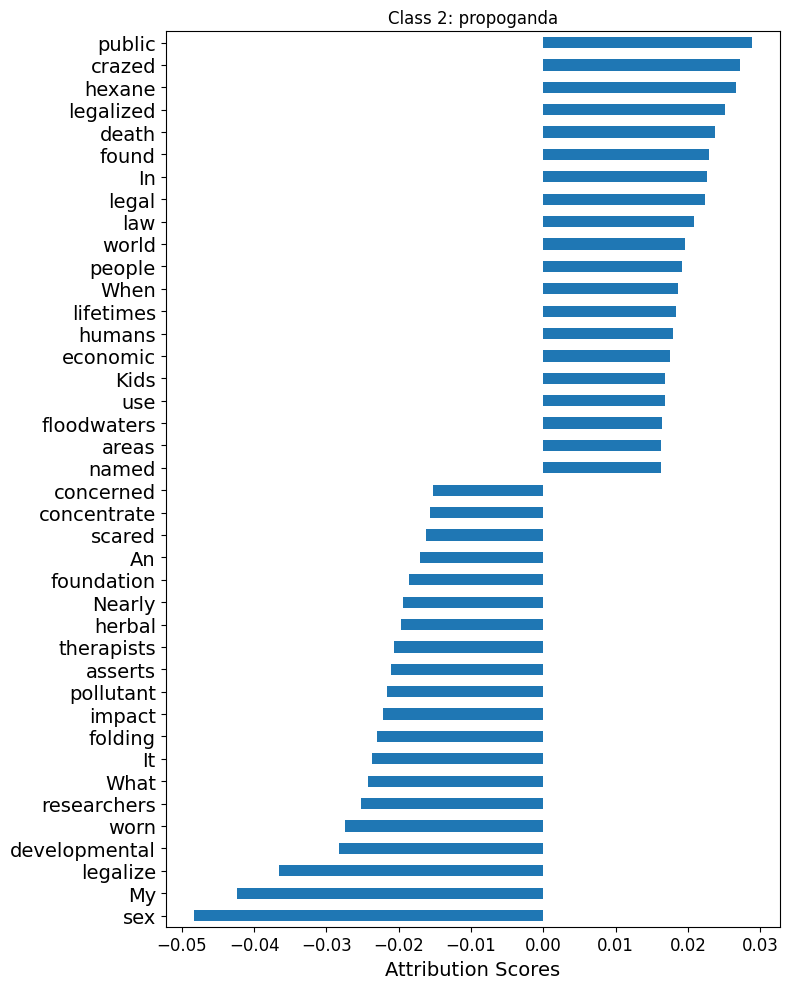

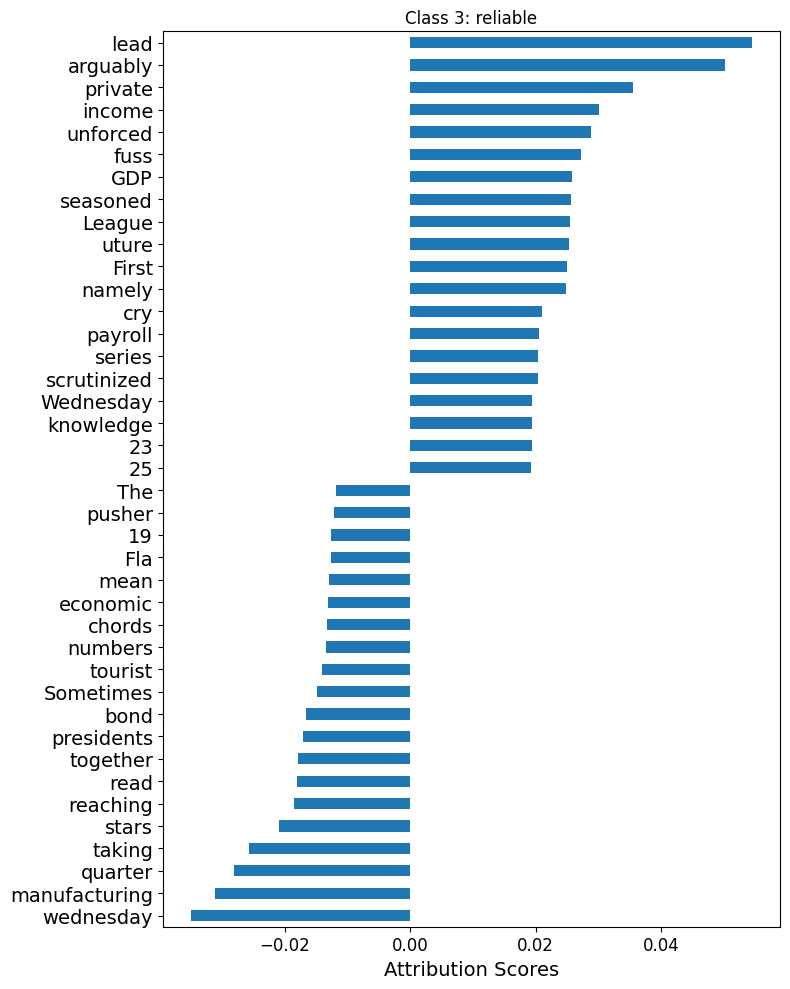

In [146]:
df_not_stopword_punc_true = df_result[fitlered_words_impt_true].drop(['Unnamed: 0','predicted_class_labels'],axis=1)
take_average_across_true_groups(df_not_stopword_punc_true,'no_stop_punc_wrt_true',20)

With respect to pred aggregate

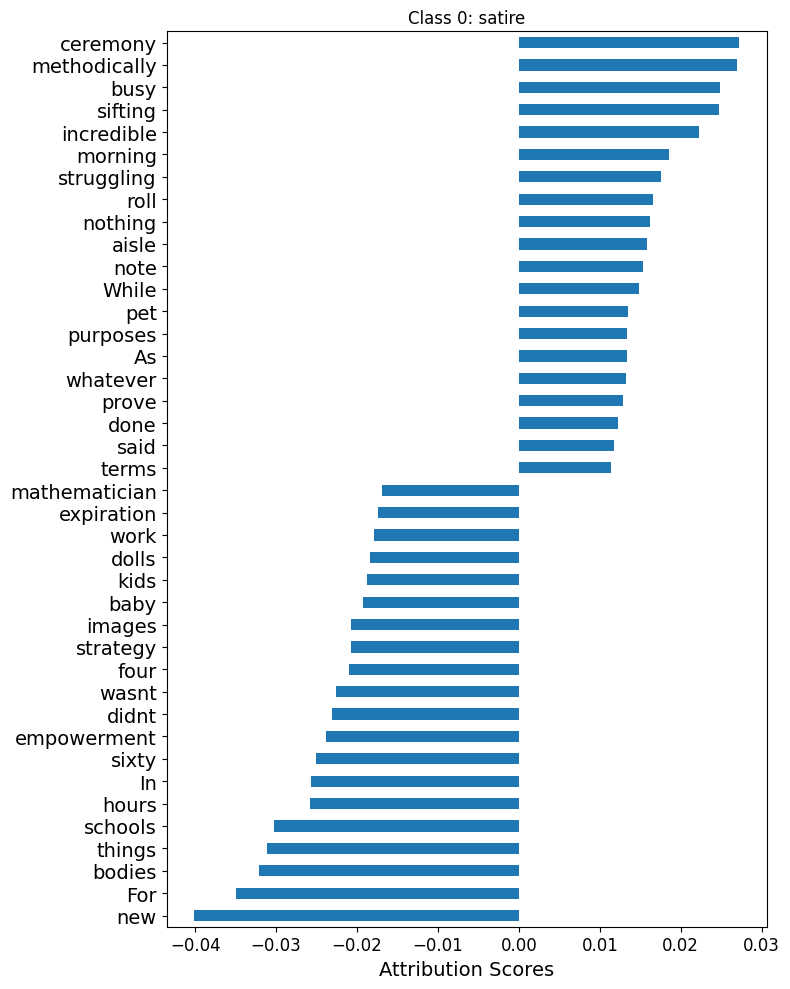

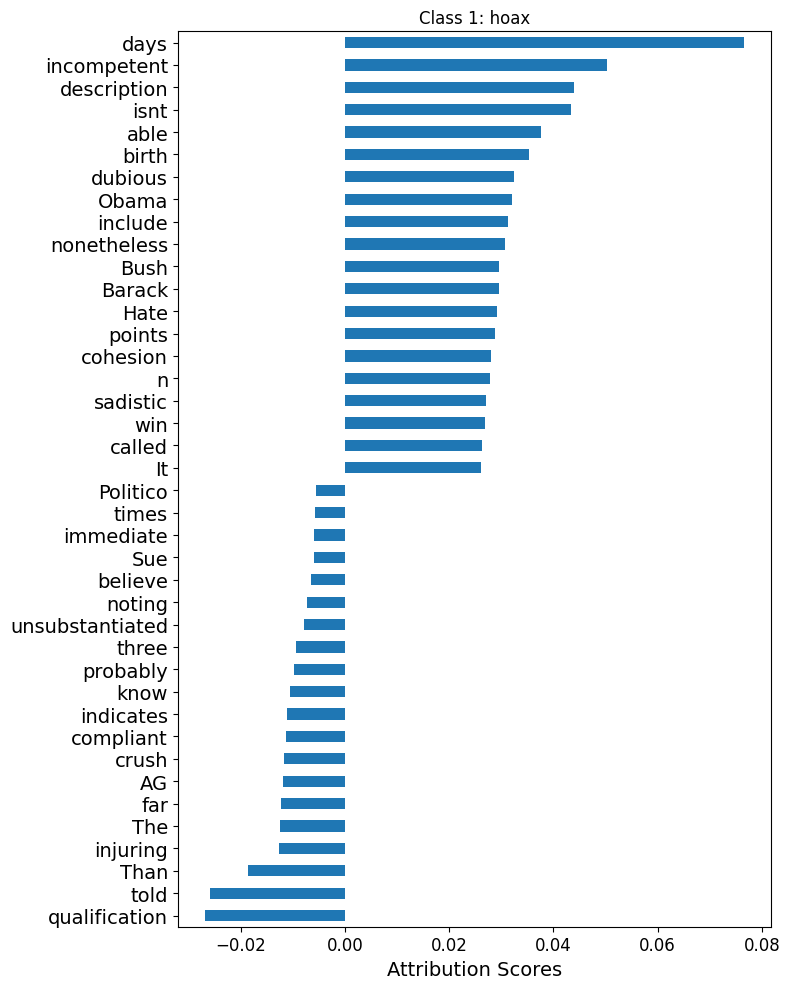

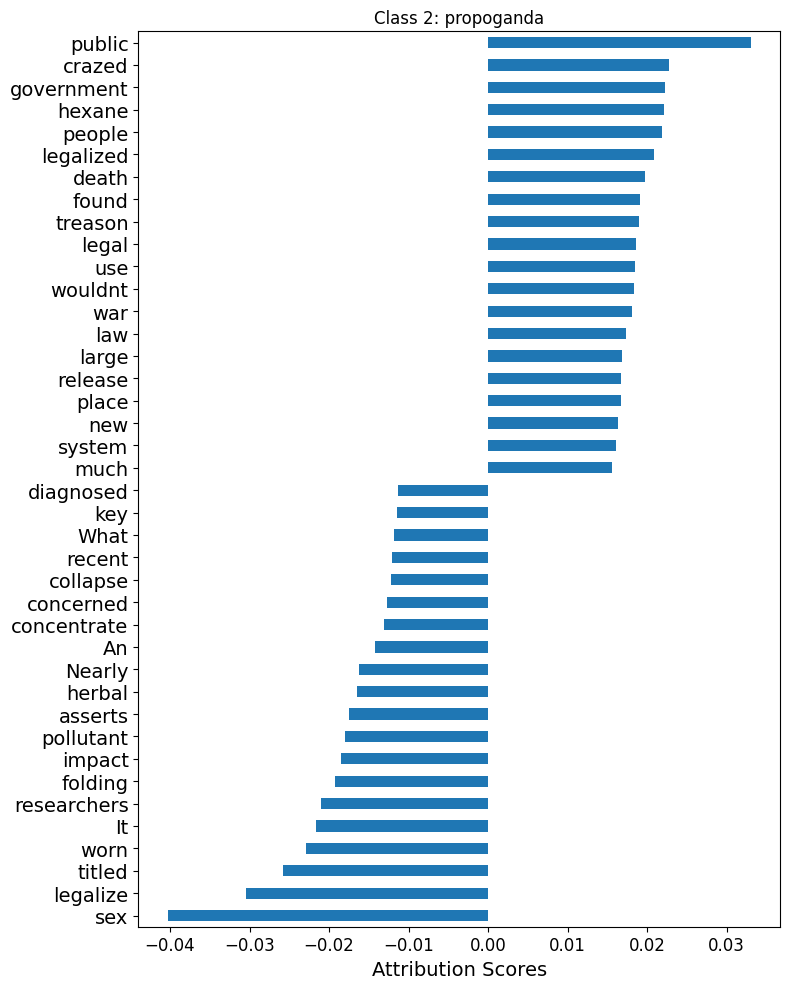

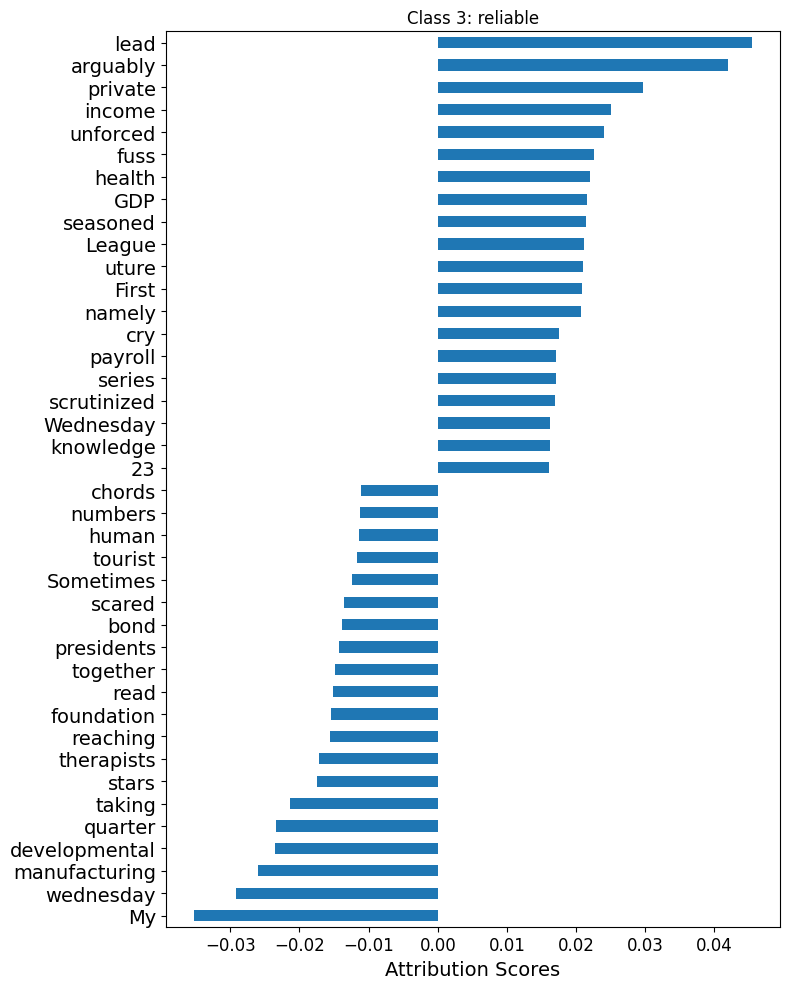

In [147]:
df_not_stopword_punc_pred = df_result[fitlered_words_impt_pred].drop(['Unnamed: 0','true_class_labels'],axis=1)
take_average_across_pred_groups(df_not_stopword_punc_pred,'no_stop_punc_wrt_pred',20)